In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as stat
plt.rcParams['figure.figsize'] = 20, 10

In [7]:
data = pd.read_csv('GAZP.csv', index_col="Date")
data = data.drop(["Open", "High", "Low", "Vol.", "Change %"], axis = 1)
data = data.iloc[::-1]
data.index = pd.to_datetime(data.index, infer_datetime_format=True)

In [8]:
from pyearth import Earth

model = Earth(allow_linear = False, max_degree = 3, minspan = 5, max_terms = 70, min_search_points = 150)
model.fit(np.array([i for i in range(1,257)]), np.array(data['Price']))
print(model.summary())

C:\Users\timos\AppData\Local\Programs\Python\Python310\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Earth Model
-----------------------------------------------------
Basis Function                 Pruned  Coefficient   
-----------------------------------------------------
(Intercept)                    No      167.05        
h(x0-183)                      No      0.888111      
h(183-x0)                      Yes     None          
h(x0-153)*h(183-x0)            Yes     None          
h(153-x0)*h(183-x0)            No      0.0795071     
h(x0-105)*h(153-x0)*h(183-x0)  No      -0.000642372  
h(105-x0)*h(153-x0)*h(183-x0)  Yes     None          
h(x0-50)*h(183-x0)             No      0.028172      
h(50-x0)*h(183-x0)             No      -0.0190811    
h(x0-225)*h(x0-183)            No      0.0331799     
h(225-x0)*h(x0-183)            No      -0.102889     
h(x0-243)*h(x0-225)*h(x0-183)  No      0.00594168    
h(243-x0)*h(x0-225)*h(x0-183)  No      0.00456412    
h(x0-249)                      No      -21.2827      
h(249-x0)                      Yes     None          
h(x0-165)*h(x0-1

C:\Users\timos\AppData\Local\Programs\Python\Python310\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


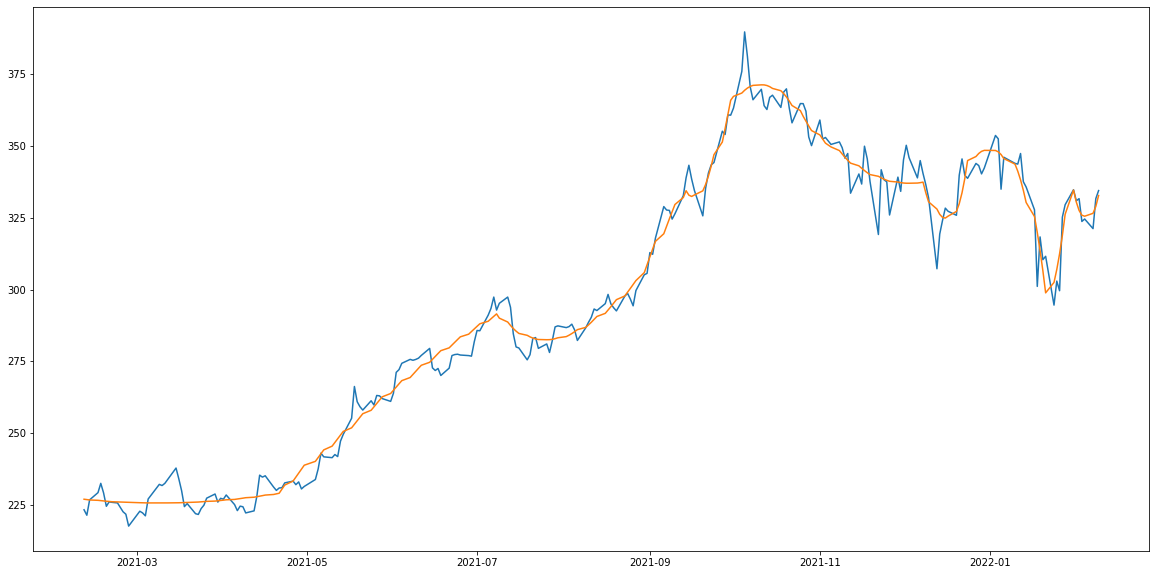

In [13]:
pred = model.predict(np.array([i for i in range(1,257)]))
pred = pd.DataFrame({'Price': list(pred), 'Date': list(data.index)})
pred.index = pred.Date
pred.pop('Date')
orig = plt.plot(data, label = "Original TS")
smth = plt.plot(pred, label = "Smoothed TS")
plt.show(block = True)